In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
pwd

'/Users/Ebtehaj/Desktop/IDS_GAN'

### Reading datasets

In [3]:
df1=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
df5=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
df8=pd.read_csv('/Users/Ebtehaj/Desktop/IDS_GAN/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')


In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [5]:
del df1,df2,df3,df4,df5,df6,df7,df8

In [6]:
df.shape

(2830743, 79)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [8]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [9]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
df[' Label'].value_counts().to_frame().sort_index(ascending=True)
#df[' Label'].value_counts()

,Label
BENIGN,2273097
Bot,1966
DDoS,128027
DoS GoldenEye,10293
DoS Hulk,231073
DoS Slowhttptest,5499
DoS slowloris,5796
FTP-Patator,7938
Heartbleed,11
Infiltration,36


In [11]:
# Dataset conatains 15 labels.
print(df[' Label'].unique())
len(df[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


15

In [12]:
# Removing whitespaces in column names.
col_names = [col.replace(' ', '') for col in df.columns]
df.columns = col_names
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
# Replace weird characters
label_names = df['Label'].unique()

import re
label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]
label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [14]:
# Replacing 'Label' column values with new readable values.
labels = df['Label'].unique()
for i in range(0,len(label_names)):
    df['Label'] = df['Label'].replace({labels[i] : label_names[i]})
    
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [15]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


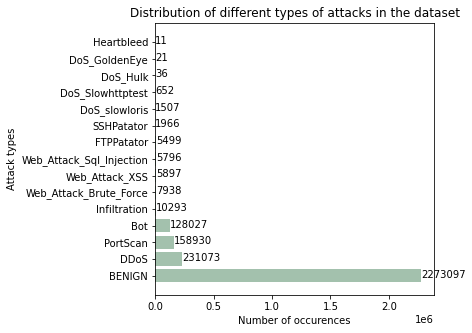

In [16]:
plt.figure(figsize=(5,5))

Labels = ('BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed')
y_pos = np.arange(len(Labels)) 
amount = df['Label'].value_counts()# [1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, Labels)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))    
plt.show()

In [16]:
# Saving cleaned dataset.
#df.to_csv("Dataset_clean.csv", index=False)

### Removing NULL values

In [16]:
df = pd.read_csv("Dataset_clean.csv")
#df.head()
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
# Checking if there are any NULL values in the dataset.
df.isnull().values.any()

True

In [18]:
# Checking which column/s contain NULL values.
[col for col in df if df[col].isnull().values.any()]

['FlowBytes/s']

In [19]:
# Checking how many NULL values it this column contains.
df['FlowBytes/s'].isnull().sum()

1358

In [20]:
1358/df.shape[0]*100

0.04797327062188267

In [21]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.
before = df.shape
df.dropna(inplace=True)
after = df.shape
before[0] - after[0]

1358

In [22]:
df.isnull().any().any()

False

### Removing infinite values

In [23]:
# convert the dataset into float except the column 'Label'
labl = df['Label']
df = df.loc[:, df.columns != 'Label'].astype('float64')

In [24]:
# Checking if all values are finite.
np.all(np.isfinite(df))

False

In [25]:
# Checking what column/s contain infinite values.
infinite = [col for col in df if not np.all(np.isfinite(df[col]))]
infinite

['FlowBytes/s', 'FlowPackets/s']

In [26]:
# Checking how many infinite values each column contains.
finite = np.isfinite(df['FlowBytes/s']).sum()
df.shape[0] - finite

1509

In [27]:
# Checking how many non-finite values each column contains.
finite = np.isfinite(df['FlowPackets/s']).sum()
df.shape[0] - finite

1509

In [28]:
1509/df.shape[0]*100

0.05333314483536175

In [29]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.
# Replacing infinite values with NaN values.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
# We can see that now we have Nan values again.
np.any(np.isnan(df))

True

In [31]:
# Bringing the Labels back into the dataset before deleting Nan rows.
#df = df.merge(labl, how='outer', left_index=True, right_index=True)

df = pd.concat([df, labl], axis=1)

In [32]:
# Removing new NaN values.
df.dropna(inplace=True)

In [33]:
df.shape

(2827876, 79)

In [34]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [35]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)
#df['Label'].value_counts()

,Label
BENIGN,2271320
Bot,1956
DDoS,128025
DoS_GoldenEye,10293
DoS_Hulk,230124
DoS_Slowhttptest,5499
DoS_slowloris,5796
FTPPatator,7935
Heartbleed,11
Infiltration,36


In [36]:
#Saving cleaned dataset.
#df.to_csv("Dataset_clean_dropna.csv", index=False)

### Grouped by types of general attack 

In [38]:
df = pd.read_csv("Dataset_clean_dropna.csv")
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [39]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,Label
BENIGN,2271320
Bot,1956
DDoS,128025
DoS_GoldenEye,10293
DoS_Hulk,230124
DoS_Slowhttptest,5499
DoS_slowloris,5796
FTPPatator,7935
Heartbleed,11
Infiltration,36


In [40]:
df["Label"] = df["Label"].map({'BENIGN': 'Benign','DoS_Hulk': 'DoS_DDoS','PortScan': 'Probe','DDoS': 'DoS_DDoS',
                               'DoS_GoldenEye': 'DoS_DDoS','FTPPatator': 'Brute_force','SSHPatator': 'Brute_force', 
                               'DoS_slowloris': 'DoS_DDoS','DoS_Slowhttptest': 'DoS_DDoS','Bot': 'Botnet',
                               'Web_Attack_Brute_Force': 'Web_attack','Web_Attack_XSS': 'Web_attack',
                               'Web_Attack_Sql_Injection' : 'Web_attack' ,'Heartbleed': 'other', 'Infiltration' : 'other', 
                              })


In [41]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,Label
Benign,2271320
Botnet,1956
Brute_force,13832
DoS_DDoS,379737
Probe,158804
Web_attack,2180
other,47


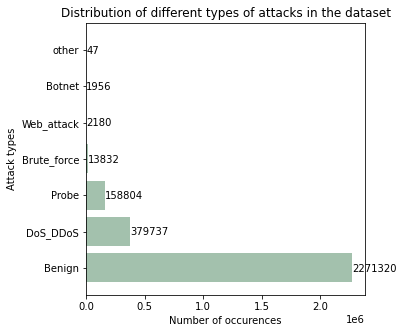

In [42]:
plt.figure(figsize=(5,5))

Labels = ('Benign', 'DoS_DDoS', 'Probe', 'Brute_force', 'Web_attack',  'Botnet', 'other')
y_pos = np.arange(len(Labels)) 
amount = df['Label'].value_counts()# [1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, Labels)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))    
plt.show()

### Data Normalizations 

In [43]:
lb = LabelEncoder()
df ['Label'] = lb.fit_transform(df['Label'])
labels = df['Label']

In [44]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,53.0,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2827872,53.0,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2827873,58030.0,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2827874,53.0,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
features = df.loc[:, df.columns != 'Label']

In [46]:
from sklearn.preprocessing import PowerTransformer


pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
df.loc[:, df.columns != 'Label']=pw.fit_transform(features)

print(df)

/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0               1.695998     -1.626221        -0.234635             -1.657288   
1               1.696355     -0.959273        -1.304105             -0.439685   
2               1.696357     -1.103693        -1.304105             -0.439685   
3               1.677730     -1.186392        -1.304105             -0.439685   
4               1.695994     -1.626221        -0.234635             -1.657288   
...                  ...           ...              ...                   ...   
2827871        -0.873506      0.117317         0.657256              0.121260   
2827872        -0.873506     -0.747579        -0.234635              0.121260   
2827873         1.701775     -1.014810        -0.234635             -0.439685   
2827874        -0.873506      0.738232         1.055160              0.121260   
2827875        -0.873506      0.313097         0.657256              0.121260   

         TotalLengthofFwdPa

In [47]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,1.695998,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
1,1.696355,-0.959273,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2,1.696357,-1.103693,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
3,1.677730,-1.186392,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
4,1.695994,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,-0.873506,0.117317,0.657256,0.121260,0.368532,0.240433,-0.018420,1.036858,0.215307,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827872,-0.873506,-0.747579,-0.234635,0.121260,0.244923,0.494855,0.167861,1.201211,0.474223,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827873,1.701775,-1.014810,-0.234635,-0.439685,-0.175278,-0.712289,0.028092,-0.995524,-0.138827,1.197215,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827874,-0.873506,0.738232,1.055160,0.121260,0.602315,0.393796,0.042637,1.092115,0.299168,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0


In [48]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,Label
0,2271320
1,1956
2,13832
3,379737
4,158804
5,2180
6,47


In [49]:
df.shape

(2827876, 79)

In [50]:
#Saving normalized dataset 
#df.to_csv("Normalized.csv", index=False)

### Data presentation

In [51]:
df = pd.read_csv("Normalized.csv")

In [52]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,1.695998,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
1,1.696355,-0.959273,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2,1.696357,-1.103693,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
3,1.677730,-1.186392,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
4,1.695994,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,-0.873506,0.117317,0.657256,0.121260,0.368532,0.240433,-0.018420,1.036858,0.215307,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827872,-0.873506,-0.747579,-0.234635,0.121260,0.244923,0.494855,0.167861,1.201211,0.474223,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827873,1.701775,-1.014810,-0.234635,-0.439685,-0.175278,-0.712289,0.028092,-0.995524,-0.138827,1.197215,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2827874,-0.873506,0.738232,1.055160,0.121260,0.602315,0.393796,0.042637,1.092115,0.299168,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0


In [53]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,Label
0,2271320
1,1956
2,13832
3,379737
4,158804
5,2180
6,47
